A graph is a structure amounting to a set of objects in which some pairs of the objects are in some sense "related". The objects correspond to mathematical abstractions called vertices (also called nodes or points) and each of the related pairs of vertices is called an edge (also called link or line).

https://networkx.org/
    

    - Data structures for graphs, digraphs, and multigraphs
    
    - Many standard graph algorithms
    
    - Network structure and analysis measures
    
    - Generators for classic graphs, random graphs, and synthetic networks
    
    - Nodes can be "anything" (e.g., text, images, XML records)
    
    - Edges can hold arbitrary data (e.g., weights, time-series)
    
    - Open source 3-clause BSD license
    
    - Well tested with over 90% code coverage
    
    - Additional benefits from Python include fast prototyping, easy to teach, and multi-platform
    
https://plotly.com/python/network-graphs/

In [ ]:
import json
import requests
from time import sleep
import plotly.graph_objects as go
import networkx as nx
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

https://www.kaggle.com/datasets/ruchi798/star-wars?resource=download

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://drive.google.com/drive/folders/1mp2Wv1_lPBR7q-AA7DEn6W5jTxx6U6HH?usp=sharing

In [ ]:
data_path = 'drive/MyDrive/archive/starwars-episode-3-interactions.json'
#   starwars-episode-N-interactions.json contains the social network extracted from Episode N,
# where the links between characters are defined by the times the characters speak within the same scene.

Nodes

    name: Name of the character
    
    value: Number of scenes the character appeared in
    
    colour: Colour in the visualization

Links represent connections between characters

    source: zero-based index of the character that is one end of the link, the order of nodes is the order in which they are listed in the “nodes” element
    
    target: zero-based index of the character that is the the other end of the link.
    
    value: Number of scenes where the “source character” and “target character” of the link appeared together.


In [ ]:
with open(data_path, 'r', encoding='utf8') as f:
    data = json.load(f)
print(data)

{'nodes': [{'name': 'ANAKIN', 'value': 53, 'colour': '#ce3b59'}, {'name': 'OBI-WAN', 'value': 59, 'colour': '#48D1CC'}, {'name': 'ODD BALL', 'value': 4, 'colour': '#808080'}, {'name': 'GENERAL GRIEVOUS', 'value': 12, 'colour': '#808080'}, {'name': 'EMPEROR', 'value': 24, 'colour': '#191970'}, {'name': 'COUNT DOOKU', 'value': 2, 'colour': '#808080'}, {'name': 'BAIL ORGANA', 'value': 20, 'colour': '#808080'}, {'name': 'C-3PO', 'value': 15, 'colour': '#FFD700'}, {'name': 'PADME', 'value': 23, 'colour': '#DDA0DD'}, {'name': 'YODA', 'value': 23, 'colour': '#9ACD32'}, {'name': 'FANG ZAR', 'value': 3, 'colour': '#808080'}, {'name': 'MON MOTHMA', 'value': 3, 'colour': '#808080'}, {'name': 'GIDDEAN DANU', 'value': 2, 'colour': '#808080'}, {'name': 'MACE WINDU', 'value': 7, 'colour': '#808080'}, {'name': 'CAPTAIN TYPHO', 'value': 3, 'colour': '#808080'}, {'name': 'CLONE COMMANDER GREE', 'value': 4, 'colour': '#808080'}, {'name': 'CLONE COMMANDER CODY', 'value': 4, 'colour': '#808080'}, {'name': 

In [ ]:
for key, value in data.items():
    print(key, len(value))

nodes 24
links 57


In [ ]:
print(data['nodes'][:2])
print(data['links'][0])

[{'name': 'ANAKIN', 'value': 53, 'colour': '#ce3b59'}, {'name': 'OBI-WAN', 'value': 59, 'colour': '#48D1CC'}]
{'source': 0, 'target': 1, 'value': 28}


In [ ]:
star_wars_graph = nx.Graph()

In [ ]:
for link in data['links']:
    star_wars_graph.add_edge(data['nodes'][link['source']]['name'], data['nodes'][link['target']]['name'],
                              weight=link['value'])

In [ ]:
list(star_wars_graph.nodes)

['ANAKIN',
 'OBI-WAN',
 'ODD BALL',
 'EMPEROR',
 'COUNT DOOKU',
 'GENERAL GRIEVOUS',
 'BAIL ORGANA',
 'C-3PO',
 'PADME',
 'YODA',
 'FANG ZAR',
 'MON MOTHMA',
 'GIDDEAN DANU',
 'MACE WINDU',
 'CAPTAIN TYPHO',
 'CLONE COMMANDER GREE',
 'CLONE COMMANDER CODY',
 'JAR JAR',
 'TION MEDON',
 'NUTE GUNRAY',
 'CAPTAIN ANTILLES',
 'QUI-GON',
 'DARTH VADER']

A vertex u is a neighbor of (or equivalently adjacent to) a vertex v in a graph G = (V,E) if there is an edge {u, v} ∈ E.

In [ ]:
list(star_wars_graph.neighbors('PADME'))

['BAIL ORGANA',
 'ANAKIN',
 'FANG ZAR',
 'MON MOTHMA',
 'GIDDEAN DANU',
 'CAPTAIN TYPHO',
 'C-3PO',
 'OBI-WAN',
 'EMPEROR']

In [ ]:
list(star_wars_graph.neighbors('DARTH VADER'))

['EMPEROR']

In [ ]:
print(len(list(star_wars_graph.neighbors('DARTH VADER'))) == star_wars_graph.degree('DARTH VADER'))

True


In [ ]:
degrees = [(name, degree) for name, degree in star_wars_graph.degree()]
for node in sorted(degrees, key=lambda x: x[1]):
    print(node)

('CLONE COMMANDER GREE', 1)
('TION MEDON', 1)
('DARTH VADER', 1)
('ODD BALL', 2)
('JAR JAR', 2)
('NUTE GUNRAY', 2)
('CAPTAIN ANTILLES', 2)
('QUI-GON', 2)
('COUNT DOOKU', 3)
('GENERAL GRIEVOUS', 3)
('CAPTAIN TYPHO', 3)
('FANG ZAR', 4)
('MON MOTHMA', 4)
('GIDDEAN DANU', 4)
('CLONE COMMANDER CODY', 4)
('MACE WINDU', 5)
('C-3PO', 8)
('YODA', 8)
('PADME', 9)
('EMPEROR', 10)
('BAIL ORGANA', 11)
('OBI-WAN', 12)
('ANAKIN', 13)


In [ ]:
len(list(nx.connected_components(star_wars_graph))[0])

23

In [ ]:
for node in {node_['name'] for node_ in data['nodes']}:
    if node not in star_wars_graph.nodes:
        print(node)
        break

PLO KOON


In [ ]:
nx.clustering(star_wars_graph)

{'ANAKIN': 0.3333333333333333,
 'OBI-WAN': 0.3484848484848485,
 'ODD BALL': 1.0,
 'EMPEROR': 0.3333333333333333,
 'COUNT DOOKU': 1.0,
 'GENERAL GRIEVOUS': 0.3333333333333333,
 'BAIL ORGANA': 0.38181818181818183,
 'C-3PO': 0.5714285714285714,
 'PADME': 0.5,
 'YODA': 0.42857142857142855,
 'FANG ZAR': 1.0,
 'MON MOTHMA': 1.0,
 'GIDDEAN DANU': 1.0,
 'MACE WINDU': 0.8,
 'CAPTAIN TYPHO': 1.0,
 'CLONE COMMANDER GREE': 0,
 'CLONE COMMANDER CODY': 1.0,
 'JAR JAR': 1.0,
 'TION MEDON': 0,
 'NUTE GUNRAY': 0,
 'CAPTAIN ANTILLES': 1.0,
 'QUI-GON': 1.0,
 'DARTH VADER': 0}

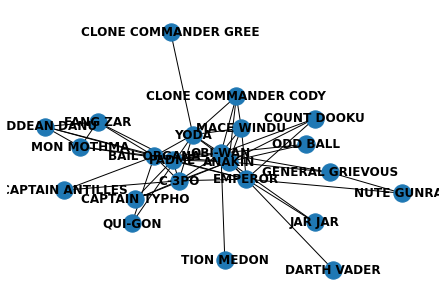

In [ ]:
nx.draw(star_wars_graph, with_labels=True, font_weight='bold')

In [ ]:
nx.shortest_path(star_wars_graph, 'ANAKIN', "PADME")

['ANAKIN', 'PADME']

In [ ]:
nx.shortest_path(star_wars_graph, 'GIDDEAN DANU', 'TION MEDON')

['GIDDEAN DANU', 'BAIL ORGANA', 'OBI-WAN', 'TION MEDON']

In [ ]:
nx.approximation.max_clique(star_wars_graph) 
# A clique in an undirected graph G = (V, E) is a subset of the vertex set C subseteq V such that for every two 
# vertices in C there exists an edge connecting the two.
# A maximum clique is a clique of the largest possible size in a given graph. 

{'ANAKIN', 'BAIL ORGANA', 'C-3PO', 'EMPEROR', 'OBI-WAN', 'PADME'}

In [ ]:
for clique in nx.find_cliques(star_wars_graph):
    print(clique)


['NUTE GUNRAY', 'EMPEROR']
['NUTE GUNRAY', 'GENERAL GRIEVOUS']
['CAPTAIN ANTILLES', 'BAIL ORGANA', 'C-3PO']
['GIDDEAN DANU', 'BAIL ORGANA', 'FANG ZAR', 'MON MOTHMA', 'PADME']
['TION MEDON', 'OBI-WAN']
['CLONE COMMANDER GREE', 'YODA']
['QUI-GON', 'BAIL ORGANA', 'YODA']
['ANAKIN', 'CAPTAIN TYPHO', 'C-3PO', 'PADME']
['ANAKIN', 'OBI-WAN', 'YODA', 'MACE WINDU', 'CLONE COMMANDER CODY']
['ANAKIN', 'OBI-WAN', 'YODA', 'C-3PO', 'BAIL ORGANA']
['ANAKIN', 'OBI-WAN', 'GENERAL GRIEVOUS']
['ANAKIN', 'OBI-WAN', 'EMPEROR', 'MACE WINDU']
['ANAKIN', 'OBI-WAN', 'EMPEROR', 'C-3PO', 'BAIL ORGANA', 'PADME']
['ANAKIN', 'OBI-WAN', 'EMPEROR', 'COUNT DOOKU']
['ANAKIN', 'OBI-WAN', 'ODD BALL']
['ANAKIN', 'JAR JAR', 'EMPEROR']
['DARTH VADER', 'EMPEROR']


In [ ]:
for bridge in nx.bridges(star_wars_graph): #  a bridge is an edge that does not belong to any cycle.
    print(bridge)

('OBI-WAN', 'TION MEDON')
('EMPEROR', 'DARTH VADER')
('YODA', 'CLONE COMMANDER GREE')


How important is each node?

In [ ]:
sorted([(name, dc) for (name, dc) in nx.degree_centrality(star_wars_graph).items()], key=lambda x: x[1], reverse=True)

[('ANAKIN', 0.5909090909090909),
 ('OBI-WAN', 0.5454545454545454),
 ('BAIL ORGANA', 0.5),
 ('EMPEROR', 0.4545454545454546),
 ('PADME', 0.4090909090909091),
 ('C-3PO', 0.36363636363636365),
 ('YODA', 0.36363636363636365),
 ('MACE WINDU', 0.2272727272727273),
 ('FANG ZAR', 0.18181818181818182),
 ('MON MOTHMA', 0.18181818181818182),
 ('GIDDEAN DANU', 0.18181818181818182),
 ('CLONE COMMANDER CODY', 0.18181818181818182),
 ('COUNT DOOKU', 0.13636363636363635),
 ('GENERAL GRIEVOUS', 0.13636363636363635),
 ('CAPTAIN TYPHO', 0.13636363636363635),
 ('ODD BALL', 0.09090909090909091),
 ('JAR JAR', 0.09090909090909091),
 ('NUTE GUNRAY', 0.09090909090909091),
 ('CAPTAIN ANTILLES', 0.09090909090909091),
 ('QUI-GON', 0.09090909090909091),
 ('CLONE COMMANDER GREE', 0.045454545454545456),
 ('TION MEDON', 0.045454545454545456),
 ('DARTH VADER', 0.045454545454545456)]

In [ ]:
closeness_centrality = nx.closeness_centrality(star_wars_graph)
sorted([(name, dc) for (name, dc) in closeness_centrality.items()], key=lambda x: x[1], reverse=True)
# the node is the most important, if it is the closest (has the shortest path) to all nodes

[('ANAKIN', 0.7096774193548387),
 ('OBI-WAN', 0.6875),
 ('BAIL ORGANA', 0.6666666666666666),
 ('EMPEROR', 0.6285714285714286),
 ('C-3PO', 0.6111111111111112),
 ('PADME', 0.6111111111111112),
 ('YODA', 0.5789473684210527),
 ('MACE WINDU', 0.5116279069767442),
 ('CAPTAIN TYPHO', 0.4782608695652174),
 ('CLONE COMMANDER CODY', 0.4782608695652174),
 ('COUNT DOOKU', 0.46808510638297873),
 ('GENERAL GRIEVOUS', 0.4583333333333333),
 ('JAR JAR', 0.4489795918367347),
 ('ODD BALL', 0.44),
 ('FANG ZAR', 0.44),
 ('MON MOTHMA', 0.44),
 ('GIDDEAN DANU', 0.44),
 ('QUI-GON', 0.44),
 ('CAPTAIN ANTILLES', 0.4230769230769231),
 ('TION MEDON', 0.41509433962264153),
 ('NUTE GUNRAY', 0.4074074074074074),
 ('DARTH VADER', 0.39285714285714285),
 ('CLONE COMMANDER GREE', 0.3728813559322034)]

In [ ]:
betweenness_centrality = nx.betweenness_centrality(star_wars_graph)
sorted([(name, dc) for (name, dc) in betweenness_centrality.items()], key=lambda x: x[1], reverse=True)
# the node is most important if it serves as a bridge from one part of a graph to another.
# Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph.  

[('BAIL ORGANA', 0.2206349206349207),
 ('OBI-WAN', 0.21130694702123273),
 ('ANAKIN', 0.2101525458668316),
 ('EMPEROR', 0.2052772624201196),
 ('YODA', 0.12948876520305094),
 ('PADME', 0.10433931148216866),
 ('C-3PO', 0.058018965161822304),
 ('GENERAL GRIEVOUS', 0.013945578231292518),
 ('MACE WINDU', 0.008451865594722737),
 ('NUTE GUNRAY', 0.002886002886002886),
 ('ODD BALL', 0.0),
 ('COUNT DOOKU', 0.0),
 ('FANG ZAR', 0.0),
 ('MON MOTHMA', 0.0),
 ('GIDDEAN DANU', 0.0),
 ('CAPTAIN TYPHO', 0.0),
 ('CLONE COMMANDER GREE', 0.0),
 ('CLONE COMMANDER CODY', 0.0),
 ('JAR JAR', 0.0),
 ('TION MEDON', 0.0),
 ('CAPTAIN ANTILLES', 0.0),
 ('QUI-GON', 0.0),
 ('DARTH VADER', 0.0)]

https://towardsdatascience.com/tutorial-network-visualization-basics-with-networkx-and-plotly-and-a-little-nlp-57c9bbb55bb9

In [ ]:
positions = nx.spring_layout(star_wars_graph)

In [ ]:
positions

{'ANAKIN': array([-0.03522905,  0.07791426]),
 'OBI-WAN': array([0.06981339, 0.08898758]),
 'ODD BALL': array([-0.04984111,  0.48421252]),
 'EMPEROR': array([-0.18259998,  0.12511278]),
 'COUNT DOOKU': array([-0.31743039,  0.50149731]),
 'GENERAL GRIEVOUS': array([0.23638775, 0.49329336]),
 'BAIL ORGANA': array([ 0.00264772, -0.23862992]),
 'C-3PO': array([-0.21167677, -0.1003521 ]),
 'PADME': array([-0.09166801, -0.18296782]),
 'YODA': array([ 0.23454053, -0.08290343]),
 'FANG ZAR': array([-0.14445014, -0.60396225]),
 'MON MOTHMA': array([ 0.06336736, -0.60962386]),
 'GIDDEAN DANU': array([-0.0745279, -0.8242113]),
 'MACE WINDU': array([0.23170795, 0.13662988]),
 'CAPTAIN TYPHO': array([-0.39655734, -0.30779115]),
 'CLONE COMMANDER GREE': array([ 1.        , -0.23632341]),
 'CLONE COMMANDER CODY': array([0.48737632, 0.11834941]),
 'JAR JAR': array([-0.61597871,  0.41238076]),
 'TION MEDON': array([0.43202106, 0.89386565]),
 'NUTE GUNRAY': array([0.36957241, 0.6827156 ]),
 'CAPTAIN ANT

In [ ]:
def make_edge(x, y, text, width):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue'),
                       hoverinfo = 'text',
                       text      = ([text]),
                       mode      = 'lines')

In [ ]:
def draw_plotly_graph(graph, centrality):
    print('making spring layout')
    positions = nx.spring_layout(graph)
    print('made spring layout')
    # For each edge, make an edge_trace, append to list
    edge_trace = []
    for edge in tqdm(graph.edges()):
        char_1 = edge[0]
        char_2 = edge[1]
        x0, y0 = positions[char_1]
        x1, y1 = positions[char_2]
        text   = char_1 + '--' + char_2 + ': ' + str(graph.edges()[edge]['weight'])

        trace  = make_edge([x0, x1, None], [y0, y1, None], text, 
                           width = 0.3*graph.edges()[edge]['weight']**1.75)
        edge_trace.append(trace)
        
    # Customize layout
    layout = go.Layout(
        paper_bgcolor='rgba(0,0,0,0)', # transparent background
        plot_bgcolor='rgba(0,0,0,0)', # transparent 2nd background
        xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
        yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
    )# Create figure
    fig = go.Figure(layout = layout)# Add all edge traces
    for trace in edge_trace:
        fig.add_trace(trace)
    for node in graph.nodes():
        # Make a node trace
        node_trace = go.Scatter(x         = [],
                                y         = [],
                                text      = [],
                                textposition = "top center",
                                textfont_size = 10,
                                mode      = 'markers+text',
                                #hoverinfo = 'none',
                                marker    = dict(color = [],
                                                size  = [],
                                                line  = None,
                                                ))
        # For each node, get the position and size and add to the node_trace
        x, y = positions[node]
        node_trace['x'] += tuple([x])
        node_trace['y'] += tuple([y])
        node_trace['marker']['color'] += tuple(['red'])
        size = abs(int(centrality[node] * 100))
        if size == 0:
            size = 1
        node_trace['marker']['size'] = size
        node_trace['text'] += tuple(['<b>' + node + '</b>'])
        fig.add_trace(node_trace)# Remove legend
    
    # Add node trace
    
    fig.update_layout(showlegend = False)# Remove tick labels
    fig.update_xaxes(showticklabels = False)
    fig.update_yaxes(showticklabels = False)# Show figure
    fig.show()

In [ ]:
draw_plotly_graph(star_wars_graph, closeness_centrality)

making spring layout
made spring layout


  0%|          | 0/57 [00:00<?, ?it/s]

In [ ]:
draw_plotly_graph(star_wars_graph, betweenness_centrality)

making spring layout
made spring layout


  0%|          | 0/57 [00:00<?, ?it/s]

https://dev.vk.com

The following won't work without vk access token

In [ ]:
request_str = f"https://api.vk.com/method/friends.get?user_id=577497926&fields=nicknames&v=5.131&access_token={ACCESS_TOKEN}" 

In [ ]:
r = requests.get(request_str)

In [ ]:
response = r.json()
response

In [ ]:
response_items = response['response']['items']

In [ ]:
social_graph = nx.Graph()
for item in response_items:
    social_graph.add_edge('Maria Schneider', item['first_name'] + ' ' + item['last_name'],
                              weight=1)

In [ ]:
nx.draw(social_graph, with_labels=True, font_weight='bold')

In [ ]:
def get_friends(item, depth, social_graph):
    if depth < 3:
        name = item['first_name'] + ' ' + item['last_name']
        request_str = f"https://api.vk.com/method/friends.get?user_id={item['id']}&count=50&access_token={ACCESS_TOKEN}&v=5.131&fields=nickname"
        r = requests.get(request_str)
        response = r.json()
        if response.get('response') is not None:
            depth = depth + 1
            for r_item in response['response']['items']:
                social_graph.add_edge(name, r_item['first_name'] + ' ' + r_item['last_name'],
                                          weight=1)
                depth, social_graph = get_friends(r_item, depth, social_graph)
        sleep(0.3)
    return depth, social_graph

In [ ]:
for item in tqdm(response_items):
    depth, social_graph = get_friends(item, 1, social_graph)

In [ ]:
nx.draw(social_graph, with_labels=True, font_weight='bold')

In [ ]:
len(list(nx.connected_components(social_graph))[0])

In [ ]:
depth

In [ ]:
betweenness_centrality = nx.betweenness_centrality(social_graph)
draw_plotly_graph(social_graph, betweenness_centrality)